# BBC Data Classification with LSTM
Nama: Bryan Herdianto  
Email: bryan.herdianto17@gmail.com

In [1]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/bryanherdianto/data-science-mini-projects/main/bbc-data-classification/bbc_data.csv')
df

,data,labels
0,Musicians to tackle US red tape Musicians gro...,entertainment
1,"U2s desire to be number one U2, who have won ...",entertainment
2,Rocker Doherty in on-stage fight Rock singer ...,entertainment
3,Snicket tops US box office chart The film ada...,entertainment
4,"Oceans Twelve raids box office Oceans Twelve,...",entertainment
...,...,...
2220,Warning over Windows Word files Writing a Mic...,tech
2221,Fast lifts rise into record books Two high-sp...,tech
2222,Nintendo adds media playing to DS Nintendo is...,tech
2223,Fast moving phone viruses appear Security fir...,tech


In [3]:
category = pd.get_dummies(df['labels'])
df_baru = pd.concat([df, category], axis=1)
df_baru = df_baru.drop(columns='labels')
df_baru

,data,business,entertainment,politics,sport,tech
0,Musicians to tackle US red tape Musicians gro...,False,True,False,False,False
1,"U2s desire to be number one U2, who have won ...",False,True,False,False,False
2,Rocker Doherty in on-stage fight Rock singer ...,False,True,False,False,False
3,Snicket tops US box office chart The film ada...,False,True,False,False,False
4,"Oceans Twelve raids box office Oceans Twelve,...",False,True,False,False,False
...,...,...,...,...,...,...
2220,Warning over Windows Word files Writing a Mic...,False,False,False,False,True
2221,Fast lifts rise into record books Two high-sp...,False,False,False,False,True
2222,Nintendo adds media playing to DS Nintendo is...,False,False,False,False,True
2223,Fast moving phone viruses appear Security fir...,False,False,False,False,True


In [4]:
abstraksi = df_baru['data'].values
label = df_baru[["business", "entertainment", "politics", "sport", "tech"]].values

In [5]:
from sklearn.model_selection import train_test_split

abstraksi_train, abstraksi_test, label_train, label_test = train_test_split(abstraksi, label, test_size=0.2, stratify=label)

In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000, oov_token='x')
tokenizer.fit_on_texts(abstraksi_train)
tokenizer.fit_on_texts(abstraksi_test)

sekuens_train = tokenizer.texts_to_sequences(abstraksi_train)
sekuens_test = tokenizer.texts_to_sequences(abstraksi_test)

padded_train = pad_sequences(sekuens_train)
padded_test = pad_sequences(sekuens_test)

In [11]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=5000, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 16)          80000     
                                                                 
 lstm_2 (LSTM)               (None, 64)                20736     
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 5)                 325       
                                                                 
Total params: 117,637
Trainable params: 117,637
Non-trainable params: 0
_________________________________________________________________


In [12]:
num_epochs = 15
history = model.fit(padded_train, label_train, epochs=num_epochs,
                    validation_data=(padded_test, label_test), verbose=2,
                    callbacks=[early_stopping])

Epoch 1/15
56/56 - 235s - loss: 1.6072 - accuracy: 0.2303 - val_loss: 1.5767 - val_accuracy: 0.3393 - 235s/epoch - 4s/step
Epoch 2/15
56/56 - 235s - loss: 1.4265 - accuracy: 0.3753 - val_loss: 1.1324 - val_accuracy: 0.5034 - 235s/epoch - 4s/step
Epoch 3/15
56/56 - 230s - loss: 0.9233 - accuracy: 0.5916 - val_loss: 0.9761 - val_accuracy: 0.5843 - 230s/epoch - 4s/step
Epoch 4/15
56/56 - 314s - loss: 0.6669 - accuracy: 0.6899 - val_loss: 0.9124 - val_accuracy: 0.6517 - 314s/epoch - 6s/step
Epoch 5/15
56/56 - 336s - loss: 0.4454 - accuracy: 0.8275 - val_loss: 0.9796 - val_accuracy: 0.6697 - 336s/epoch - 6s/step
Epoch 6/15
56/56 - 338s - loss: 0.3194 - accuracy: 0.8775 - val_loss: 0.8902 - val_accuracy: 0.7303 - 338s/epoch - 6s/step
Epoch 7/15
56/56 - 337s - loss: 0.1413 - accuracy: 0.9522 - val_loss: 0.8601 - val_accuracy: 0.7551 - 337s/epoch - 6s/step
Epoch 8/15
56/56 - 336s - loss: 0.0532 - accuracy: 0.9843 - val_loss: 0.9912 - val_accuracy: 0.7910 - 336s/epoch - 6s/step
Epoch 9/15
56/56

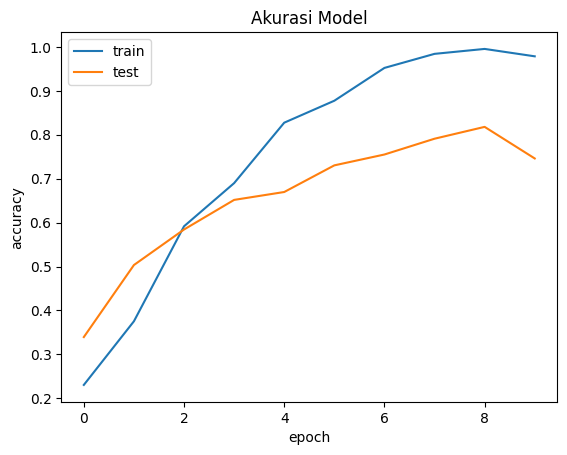

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

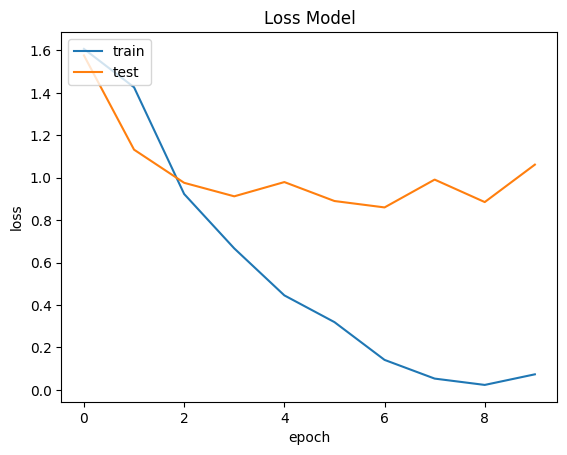

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [17]:
import numpy as np

index = 393

# testing model on specific input
input = df['data'][index]
padded_input = pad_sequences(tokenizer.texts_to_sequences(input))

# Predict the result
predicted_result = model.predict(padded_input)

predicted_class = np.argmax(predicted_result, axis=1)[0]  # Get the index of the highest probability

# Define the class index to label mapping
index_to_label = {0: "business", 1: "entertainment", 2: "politics", 3: "sport", 4: "tech"}  # Add all class indices and their labels

# Convert the predicted index to a string label
predicted_label = index_to_label[predicted_class]

real_result = df['labels'][index]

print("Input:\n" + input)
print("\nPredicted Result:\n" + predicted_label)
print("\nReal Result:\n" + real_result)

53/53 [==============================] - 0s 3ms/step
Input:
Parmalat to return to stockmarket  Parmalat, the Italian dairy company which went bust after an accounting scandal, hopes to be back on the Italian stock exchange in July.  The firm gained protection from creditors in 2003 after revealing debts of 14bn euros ($18.34bn; xc2xa39.6bn). This was eight times higher than it had previously stated. In a statement issued on Wednesday night, Parmalat Finanziaria detailed administrators latest plans for re-listing the shares of the group.  As part of the re-listing on the Italian stock exchange, creditors debts are expected to be converted into shares through two new share issues amounting to more than 2bn euros. The companys creditors will be asked to vote on the plan later this year. The plan is likely to give creditors of Parmalat Finanziaria shares worth about 5.7% of the debts they are owed. This is lower than the 11.3% creditors previously hoped to receive. Creditors of Parmalat, t